In [149]:
import numpy as np
from scipy.stats import norm
from tqdm import tqdm,trange
import matplotlib.pyplot as plt

d = 400 and fraction α = 0.5, so that n1 = n2 = 800

In [229]:
def compute_figure1a_theory(mu1,mu2,sigma,n,d):
    x1 = np.random.multivariate_normal(mean=mu1,cov=sigma,size=n)
    x2 = np.random.multivariate_normal(mean=mu2,cov=sigma,size=n)
    
    # compute classical theory and high-dim theory error
    T = 1/2*(mu1.T@sigma@mu1 - mu2.T@sigma@mu2)
    sig = np.sqrt((mu1-mu2).T@sigma@(mu1-mu2))
    gamma = np.sqrt((mu1-mu2).T@(mu1-mu2))
    a = d/n
    classical = norm.cdf(-sig/2)
    high_dim = norm.cdf(-gamma**2/(2*np.sqrt(gamma**2+2*a))) 
    return [classical,high_dim]



def compute_figure1a_empirical(mu1,mu2,sigma,n,d):
    ret = []
    # compute gx1, gx2, T to get misclassification rate
    for _ in range(50):
        gamma = np.sqrt((mu1-mu2).T@(mu1-mu2))
        a = d/n
        x1 = np.random.multivariate_normal(mean=mu1,cov=sigma,size=n)
        x2 = np.random.multivariate_normal(mean=mu2,cov=sigma,size=n)
        
        m1 = np.mean(x1,axis=0)
        m2 = np.mean(x2,axis=0)
        
        x1 = np.random.multivariate_normal(mean=mu1,cov=sigma,size=n)
        x2 = np.random.multivariate_normal(mean=mu2,cov=sigma,size=n)
        
        phi1 = (m1-m2).T@(x1-(m1+m2)/2).T
        phi2 = (m1-m2).T@(x2-(m1+m2)/2).T
        err = (np.sum(phi1<=0)+np.sum(phi2>0))/n/2
        ret.append(err)
    return ret

In [221]:
d = 400
n = 800

# construct mu1, mu2, sigma
mu1 = np.zeros(d)
gamma = 1
mu2 = np.ones(d)*gamma/np.sqrt(d)
sigma = np.eye(d)

compute_figure1(mu1,mu2,sigma,n,d)

[0.3085375387259869, 0.3618368049158815]

In [230]:
emps = []
for gamma in tqdm(np.linspace(1,2,11)):
    mu1 = np.zeros(d)
    mu2 = np.ones(d)*gamma/np.sqrt(d)
    sigma = np.eye(d)
    emps.append(compute_figure1a_empirical(mu1,mu2,sigma,n,d))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [07:23<00:00, 40.35s/it]


In [222]:
theory = []
for gamma in tqdm(np.linspace(1,2,101)):
    mu1 = np.zeros(d)
    mu2 = np.ones(d)*gamma/np.sqrt(d)
    sigma = np.eye(d)
    theory.append(compute_figure1a_theory(mu1,mu2,sigma,n,d))

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:38<00:00,  2.61it/s]


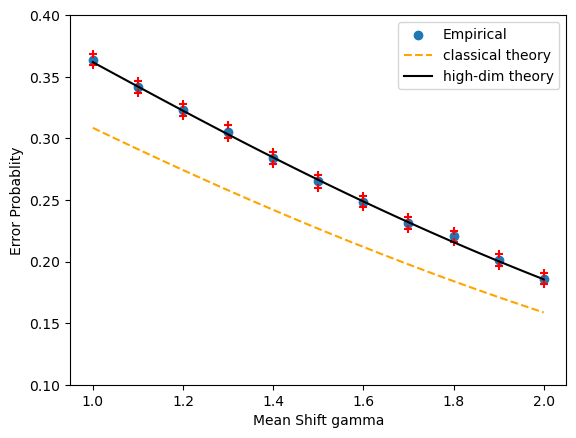

In [231]:
m = np.mean(emps,axis=1)
se = np.std(emps,axis=1) / np.sqrt(len(emps[0]))
fig, ax1 = plt.subplots()
ax1.scatter(x=np.linspace(1,2,11),y=m,label='Empirical')
ax1.scatter(x=np.linspace(1,2,11),y=m+3*se,marker='+',color='red')
ax1.scatter(x=np.linspace(1,2,11),y=m-3*se,marker='+',color='red')

theory = np.array(theory)
ax1.plot(np.linspace(1,2,101),theory[:,0],linestyle='dashed',label='classical theory',color='orange')
ax1.plot(np.linspace(1,2,101),theory[:,1],label='high-dim theory',color='black')
ax1.legend()

ax1.set_xticks(np.linspace(1,2,6))
ax1.set_yticks(np.linspace(0.1,0.4,7))
ax1.set_xlabel('Mean Shift gamma')
ax1.set_ylabel('Error Probablity')

plt.show()

# figure 1b

In [205]:
emps2 = []
for a in tqdm(np.linspace(0.05,1,20)):
    gamma = 3
    n = int(d/a)
    mu1 = np.zeros(d)
    mu2 = np.ones(d)*gamma/np.sqrt(d)
    sigma = np.eye(d)
    emps2.append(compute_figure1a_empirical(mu1,mu2,sigma,n,d))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [06:34<00:00, 19.74s/it]


In [213]:
theory2 = []
for a in tqdm(np.linspace(0.05,1,100)):
    gamma = 3
    n = int(d/a)
    mu1 = np.zeros(d)
    mu2 = np.ones(d)*gamma/np.sqrt(d)
    sigma = np.eye(d)
    theory2.append(compute_figure1a_theory(mu1,mu2,sigma,n,d))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.50it/s]


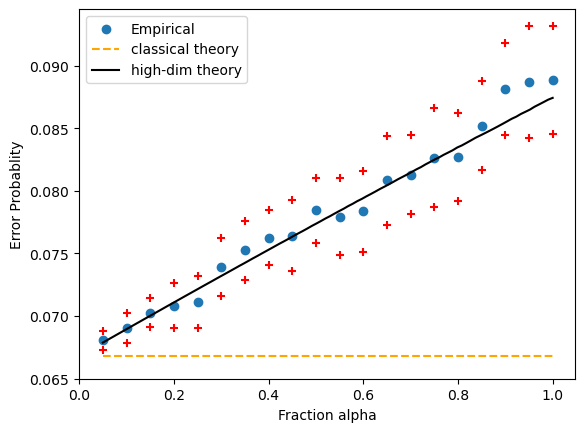

In [224]:
m = np.mean(emps2,axis=1)
se = np.std(emps2,axis=1) / np.sqrt(len(emps2[0]))
fig, ax1 = plt.subplots()
ax1.scatter(x=np.linspace(0.05,1,20),y=m,label='Empirical')
ax1.scatter(x=np.linspace(0.05,1,20),y=m+3*se,marker='+',color='red')
ax1.scatter(x=np.linspace(0.05,1,20),y=m-3*se,marker='+',color='red')

theory2 = np.array(theory2)
ax1.plot(np.linspace(0.05,1,100),theory2[:,0],linestyle='dashed',label='classical theory',color='orange')
ax1.plot(np.linspace(0.05,1,100),theory2[:,1],label='high-dim theory',color='black')
ax1.legend()

ax1.set_xticks(np.linspace(0,1,6))
ax1.set_yticks(np.linspace(0.065,0.09,6))
ax1.set_xlabel('Fraction alpha')
ax1.set_ylabel('Error Probablity')

plt.show()